# Exploratory Data Analysis on Fifa 19 Dataset

<b>Data Source: </b>https://www.kaggle.com/karangadiya/fifa19

<a href="#Exploratory-Data-Analysis">EDA</a>
<ol> 
    <li><a href="#Preferred-Foot">Preferred Foot</a> </li>
    <li><a href="#Nationality">Nationality</a> </li>
    <li><a href="#Club">Club</a> </li>
    <li><a href="#PLayer-Position">Position</a> </li>
    <li><a href="#Heights-of-players">Heights</a> </li>
    <li><a href="#Weight-of-players">Weights</a> </li>
    <li><a href="Wages">Wages </a> </li>
    <li><a href="#Joining-Date">Joining Date</a> </li>
    <li><a href="#Contract-Expiry">Contract Expiry</a> </li>
    <li><a href="#Player-Class">Player Class</a> </li>
</ol>
<br>
<a href="#Multivariate-Analysis">Multivariate Analysis</a>
<ol>
    <li><a href="#Relationship-between-Overall-and-Preferred-Foot">Relationship between Overall and Preferred Foot</a></li>
    <li><a href="#Relationship-between-positions-and-nationalities">Relationship between Nationality and position</a></li>
</ol>
<br>
<a href="#Predicting-class-using-stats-of-players">Prediction of Player Classes </a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pylab 
import scipy.stats as stats
import gc
from datetime import datetime
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

In [2]:
fifa_19 = pd.read_csv("data.csv", index_col=0)

In [3]:
fifa_19.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
fifa_19.shape

(18207, 88)

We have 18207 rows i.e. players

In [5]:
fifa_19.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [6]:
fifa_19.isnull().sum().to_dict()

{'ID': 0,
 'Name': 0,
 'Age': 0,
 'Photo': 0,
 'Nationality': 0,
 'Flag': 0,
 'Overall': 0,
 'Potential': 0,
 'Club': 241,
 'Club Logo': 0,
 'Value': 0,
 'Wage': 0,
 'Special': 0,
 'Preferred Foot': 48,
 'International Reputation': 48,
 'Weak Foot': 48,
 'Skill Moves': 48,
 'Work Rate': 48,
 'Body Type': 48,
 'Real Face': 48,
 'Position': 60,
 'Jersey Number': 60,
 'Joined': 1553,
 'Loaned From': 16943,
 'Contract Valid Until': 289,
 'Height': 48,
 'Weight': 48,
 'LS': 2085,
 'ST': 2085,
 'RS': 2085,
 'LW': 2085,
 'LF': 2085,
 'CF': 2085,
 'RF': 2085,
 'RW': 2085,
 'LAM': 2085,
 'CAM': 2085,
 'RAM': 2085,
 'LM': 2085,
 'LCM': 2085,
 'CM': 2085,
 'RCM': 2085,
 'RM': 2085,
 'LWB': 2085,
 'LDM': 2085,
 'CDM': 2085,
 'RDM': 2085,
 'RWB': 2085,
 'LB': 2085,
 'LCB': 2085,
 'CB': 2085,
 'RCB': 2085,
 'RB': 2085,
 'Crossing': 48,
 'Finishing': 48,
 'HeadingAccuracy': 48,
 'ShortPassing': 48,
 'Volleys': 48,
 'Dribbling': 48,
 'Curve': 48,
 'FKAccuracy': 48,
 'LongPassing': 48,
 'BallControl': 

### Exploratory Data Analysis

#### Preferred Foot

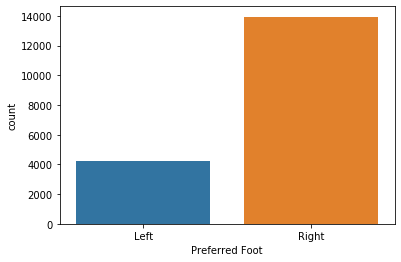

Counter({'Left': 4211, 'Right': 13948, nan: 48})

In [7]:
sns.countplot(fifa_19['Preferred Foot'])
plt.show()

pref_foot = Counter(fifa_19['Preferred Foot'])
pref_foot

Thus, majority prefer their right foot over the left.

#### Nationality

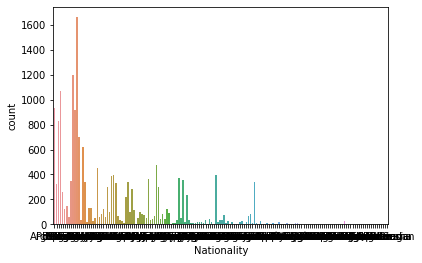

[('England', 1662),
 ('Germany', 1198),
 ('Spain', 1072),
 ('Argentina', 937),
 ('France', 914),
 ('Brazil', 827),
 ('Italy', 702),
 ('Colombia', 618),
 ('Japan', 478),
 ('Netherlands', 453),
 ('Sweden', 397),
 ('China PR', 392),
 ('Chile', 391),
 ('Republic of Ireland', 368),
 ('Mexico', 366),
 ('United States', 353),
 ('Poland', 350),
 ('Norway', 341),
 ('Saudi Arabia', 340),
 ('Denmark', 336)]

In [8]:
sns.countplot(fifa_19['Nationality'])
plt.show()
nation = Counter(fifa_19.Nationality)
nation.most_common(20)

These are the top 20 nationalities of 

In [9]:
nation.most_common()[:-10:-1]

[('Botswana', 1),
 ('Indonesia', 1),
 ('South Sudan', 1),
 ('Belize', 1),
 ('Malta', 1),
 ('Andorra', 1),
 ('Qatar', 1),
 ('Rwanda', 1),
 ('Jordan', 1)]

These are the least common Nationalities in FIFA 19

Text(0.5, 1.0, 'CDF of Nationalities')

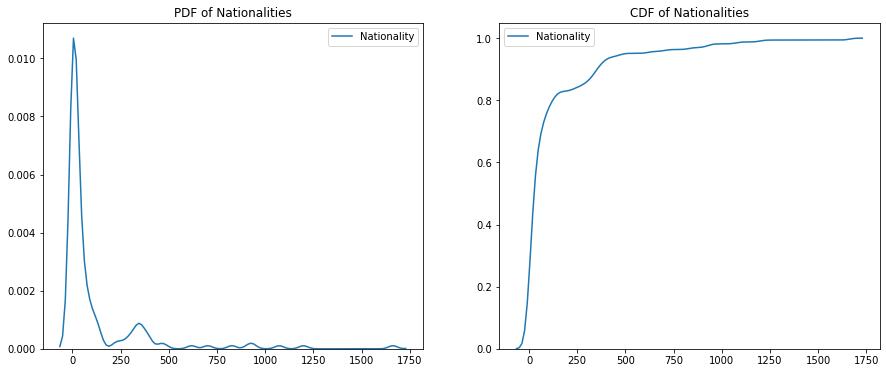

In [10]:
fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
sns.kdeplot(fifa_19['Nationality'].value_counts(), ax=ax1)
plt.title("PDF of Nationalities")

ax2 = fig.add_subplot(122)

sns.kdeplot(fifa_19['Nationality'].value_counts() ,cumulative=True, ax=ax2)
plt.title("CDF of Nationalities")

In [11]:
fifa_19['Nationality'].describe()

count       18207
unique        164
top       England
freq         1662
Name: Nationality, dtype: object

In [12]:
fifa_19['Nationality'].value_counts().describe()

count     164.000000
mean      111.018293
std       238.318199
min         1.000000
25%         3.000000
50%        15.000000
75%        81.250000
max      1662.000000
Name: Nationality, dtype: float64

Median = 15 <br>
This shows that most countries have 15 players playing in FIFA 19 <br>

#### Club

In [13]:
fifa_19.Club.describe()

count           17966
unique            651
top       Southampton
freq               33
Name: Club, dtype: object

We have 651 clubs and 33 of the players belong to Liverpool

In [14]:
fifa_19['Club'].value_counts()

Southampton           33
Fortuna Düsseldorf    33
Tottenham Hotspur     33
Liverpool             33
Manchester United     33
                      ..
Tromsø IL             20
Bahia                 20
Sligo Rovers          19
Limerick FC           19
Derry City            18
Name: Club, Length: 651, dtype: int64

Players are much more evenly distributed amongst clubs as compared to the Nationalities.

count    651.000000
mean      27.597542
std        2.588304
min       18.000000
25%       26.000000
50%       28.000000
75%       29.000000
max       33.000000
Name: Club, dtype: float64

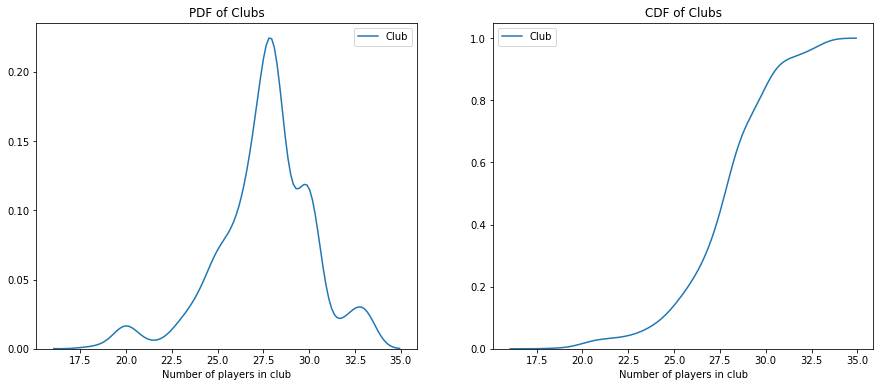

In [15]:
fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
g = sns.kdeplot(fifa_19['Club'].value_counts(), ax=ax1)
plt.title("PDF of Clubs")
plt.xlabel("Number of players in club")

ax2 = fig.add_subplot(122)
g = sns.kdeplot(fifa_19['Club'].value_counts(), cumulative=True, ax=ax2)
plt.title("CDF of Clubs")
plt.xlabel("Number of players in club")


fifa_19['Club'].value_counts().describe()

Clubs have 27-28 players on average. <br>
As mean and Median are very close, we infer that most clubs will have 28 players

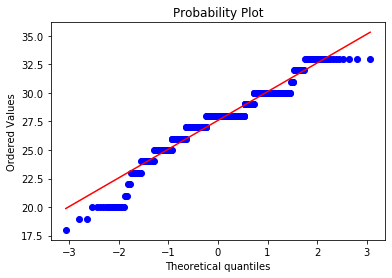

In [16]:
stats.probplot(fifa_19['Club'].value_counts(), dist="norm", plot=pylab)
plt.show()

QQ Plot shows how the Distribution of Club value_counts differs from Normal/Gaussian Distribution

#### Player Position

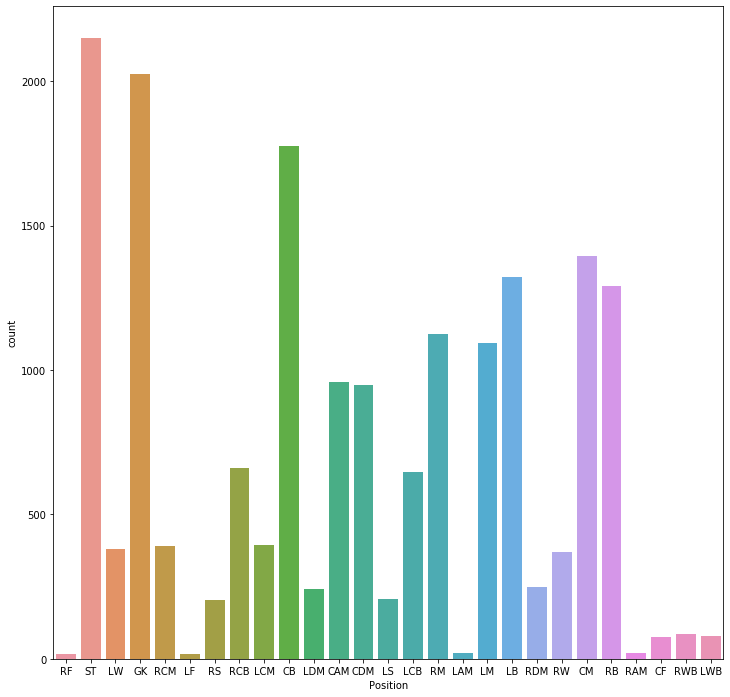

In [17]:
plt.figure(figsize=(12,12))
sns.countplot(fifa_19['Position'])

In [18]:
fifa_19['Position'].value_counts()

ST     2152
GK     2025
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
LAM      21
RAM      21
RF       16
LF       15
Name: Position, dtype: int64

Most players are Strikers <br>
Least amount of players are Left Forwards <br>

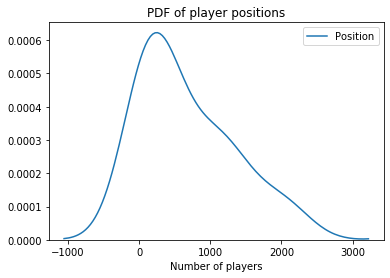

count      27.000000
mean      672.111111
std       650.647626
min        15.000000
25%       145.000000
50%       391.000000
75%      1109.500000
max      2152.000000
Name: Position, dtype: float64

In [19]:
sns.kdeplot(fifa_19['Position'].value_counts(), cumulative=False)
plt.title("PDF of player positions")
plt.xlabel("Number of players")
plt.show()

fifa_19['Position'].value_counts().describe()

#### Heights of players

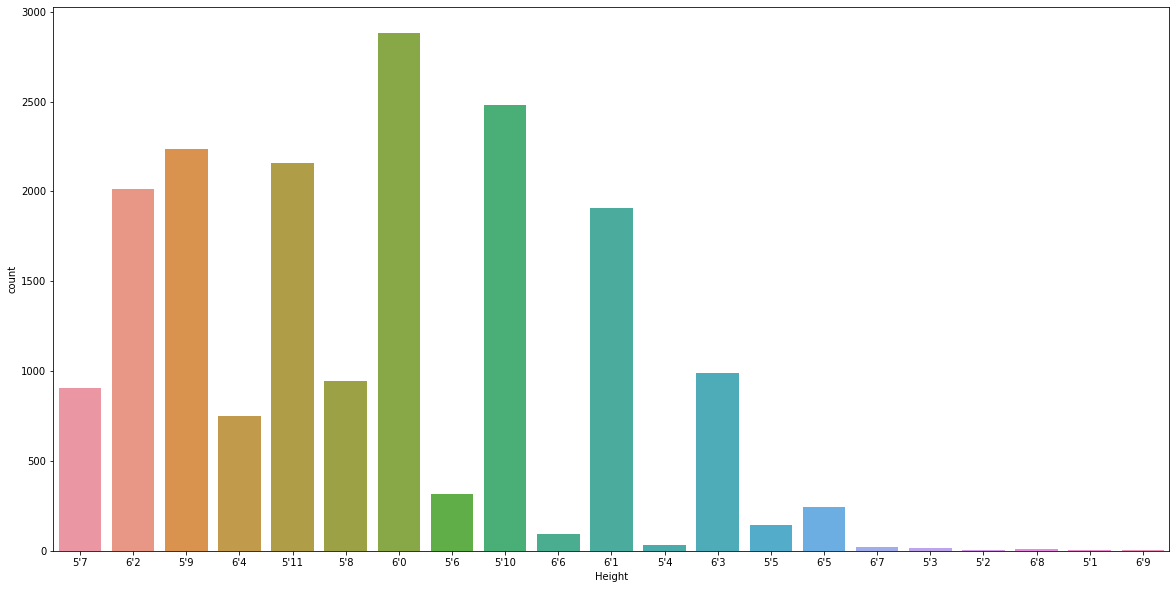

In [20]:
plt.figure(figsize=(20,10))
sns.countplot(fifa_19['Height'])

Max players have height 6 feet

#### Weights of players

In [21]:
def remove_lbs(weight):
        weight = str(weight)
        w = weight[:len(weight)-3]
        return int(w)

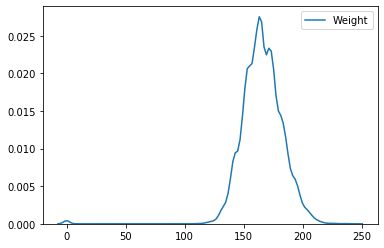

In [22]:
# Weights are continuous as compared to Heights of players
sns.kdeplot(fifa_19['Weight'].fillna("0lbs").apply(remove_lbs))

We have replaced all the 48 null values with 0 lbs and plotted PDF of the Weights of players

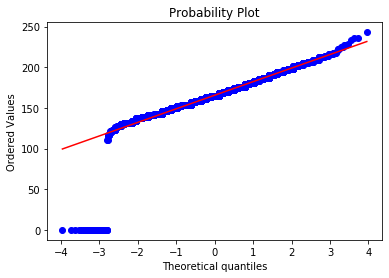

In [23]:
stats.probplot(fifa_19['Weight'].fillna("0lbs").apply(remove_lbs), dist="norm", plot=pylab)
plt.show()

Comparison of player weights as compared normal/Gaussian distribution <br>
The plot resembles Gaussian distribution but tapers off at the lower values because filled null columns with 0 lbs <br>

Finding average of non zero values and filling the average in 0lbs rows

In [24]:
mean_weight = int(fifa_19[~fifa_19.Weight.isnull()]["Weight"].apply(remove_lbs).mean())
mean_weight

165

In [25]:
fifa_19['Weight'].fillna(str(mean_weight)+"lbs", inplace=True)

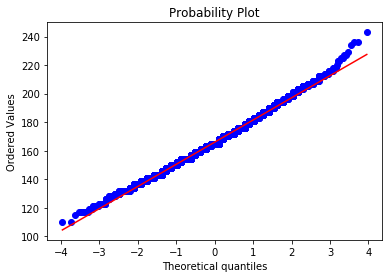

In [26]:
stats.probplot(fifa_19['Weight'].apply(remove_lbs), dist="norm", plot=pylab)
plt.show()

Filling Average weight shows that the distribution of weights is quite close to the Gaussian Distribution

Text(0.5, 1.0, 'Gaussian Curve')

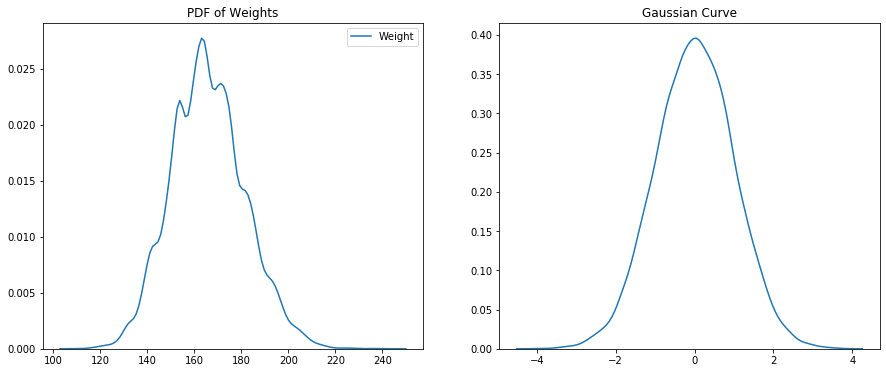

In [27]:
fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
sns.kdeplot(fifa_19['Weight'].apply(remove_lbs), ax=ax1)
plt.title("PDF of Weights")

ax2 = fig.add_subplot(122)
sns.kdeplot(np.random.randn(18000))
plt.title("Gaussian Curve")

KDE plot shows where the weight pdf differs from a normal Gaussian Curve

#### Wages

In [28]:
#Checking if any wage values are null
fifa_19['Wage'].isnull().sum()

0

In [29]:
def remove_special_symbols(wage):
    wage = str(wage)
    wage = wage[1:]
    if wage.endswith("K"):
        wage = wage[:len(wage)-1]
        w = int(wage) * 1000
    else:
        w= int(wage)
    return w

In [30]:
fifa_19['Wage'] = fifa_19['Wage'].apply(remove_special_symbols)

Text(0.5, 1.0, 'CDF of Wages')

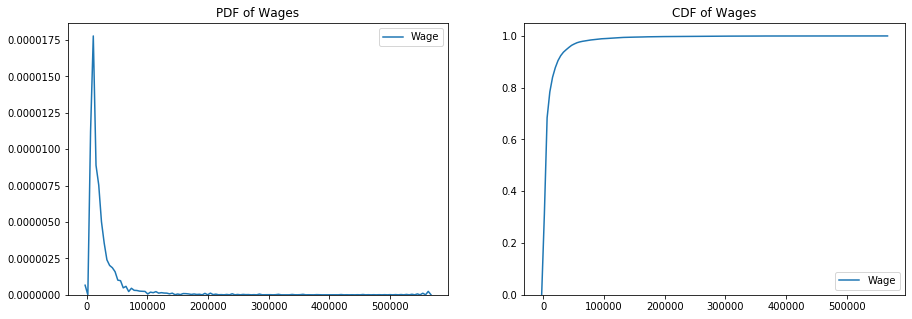

In [31]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)

g = sns.kdeplot(fifa_19["Wage"], ax=ax1)
plt.title("PDF of Wages")

ax2 = fig.add_subplot(122)
g = sns.kdeplot(fifa_19["Wage"],cumulative=True ,ax=ax2)
plt.title("CDF of Wages")

#### Joining Date

In [32]:
fifa_19['Joined'] = fifa_19[~fifa_19['Joined'].isnull()]["Joined"].apply(lambda x: datetime.strptime(str(x), "%b %d, %Y"))

Text(0.5, 1.0, 'Count of players joining a Club for each month')

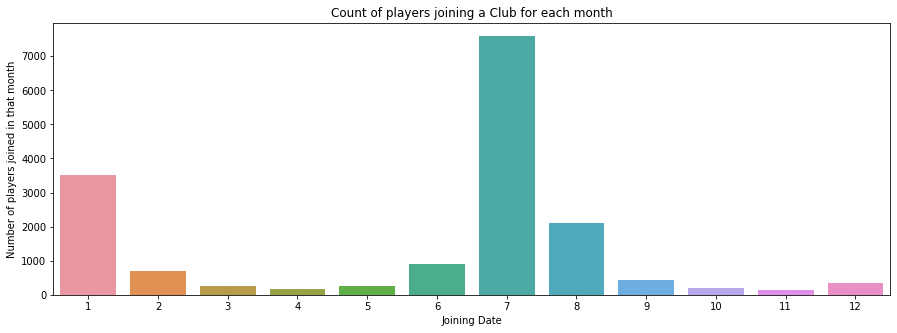

In [33]:
plt.figure(figsize=(15,5))
sns.countplot(fifa_19[~fifa_19['Joined'].isnull()]["Joined"].apply(lambda x: x.month))
plt.xlabel("Joining Date")
plt.ylabel("Number of players joined in that month")
plt.title("Count of players joining a Club for each month")

This shows that most players join a Club in July and also in January which is when the transfer window is open <br>
The summer transfer window accounts for majority of the players

Text(0.5, 1.0, 'Count of players joining a Club for each Year')

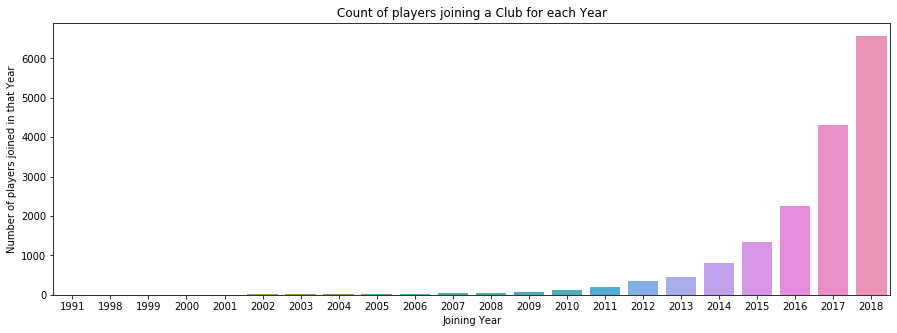

In [34]:
plt.figure(figsize=(15,5))
sns.countplot(fifa_19[~fifa_19['Joined'].isnull()]["Joined"].apply(lambda x: x.year))
plt.xlabel("Joining Year")
plt.ylabel("Number of players joined in that Year")
plt.title("Count of players joining a Club for each Year")

We can see that the number of joinings is increasing parabolically every year

#### Contract Expiry

In [35]:
np.unique(fifa_19['Contract Valid Until'].to_list())

array(['2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025',
       '2026', 'Dec 1, 2019', 'Dec 31, 2018', 'Dec 31, 2019',
       'Feb 27, 2020', 'Jan 1, 2019', 'Jan 11, 2019', 'Jan 12, 2019',
       'Jan 15, 2019', 'Jan 18, 2019', 'Jan 2, 2019', 'Jan 20, 2019',
       'Jan 25, 2019', 'Jan 3, 2019', 'Jan 30, 2019', 'Jan 31, 2019',
       'Jan 4, 2019', 'Jan 5, 2019', 'Jan 6, 2019', 'Jan 7, 2019',
       'Jun 1, 2019', 'Jun 30, 2019', 'Jun 30, 2020', 'May 31, 2019',
       'May 31, 2020', 'May 4, 2019', 'Nov 30, 2018', 'Oct 14, 2019',
       'nan'], dtype='<U12')

We need to preprocess and change them to same format

In [36]:
def change_format_contract_expiry(date):
    date = str(date)
    try:
        p = datetime.strptime(date, "%b %d, %Y")
    except:
        p = datetime.strptime(date,"%Y")
    
    return p.year

Text(0.5, 1.0, 'Count of when most contracts expire')

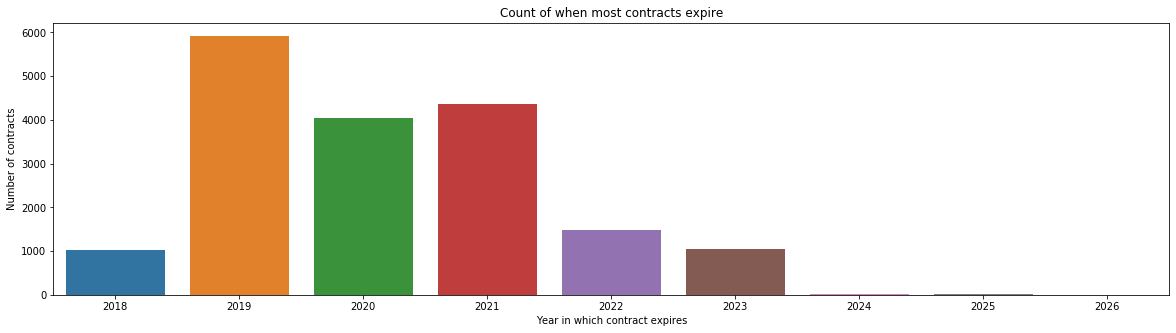

In [37]:
plt.figure(figsize=(20,5))
sns.countplot(fifa_19[~fifa_19['Contract Valid Until'].isnull()]['Contract Valid Until'].apply(change_format_contract_expiry))
plt.xlabel("Year in which contract expires")
plt.ylabel("Number of contracts")
plt.title("Count of when most contracts expire")

We have converted each contract to contract year only as all of them had year values even if month and date values were not present <br>
We can see that most player contracts are expiring in 2019

In [38]:
fifa_19.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

#### Player Class
Classifying each player as attacker, midfielder, defender or goalkeeper i.e. 4 classes

In [39]:
np.unique(fifa_19['Position'].to_list())

array(['CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LAM', 'LB', 'LCB', 'LCM',
       'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB', 'RAM', 'RB', 'RCB', 'RCM',
       'RDM', 'RF', 'RM', 'RS', 'RW', 'RWB', 'ST', 'nan'], dtype='<U3')

In [40]:
def define_position(pos):
    pos = str(pos)
    attack = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW']
    mid = ['LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB']
    defence = ['LB', 'LCB', 'CB', 'RCB', 'RB']
    
    if pos in attack:
        return "Attacker"
    elif pos in mid:
        return "Midfielder"
    elif pos in defence:
        return "Defender"
    elif pos=="GK":
        return "Goalkeeper"
    elif pos=='nan':
        return "nan"

In [41]:
fifa_19['Class'] = fifa_19['Position'].apply(define_position)

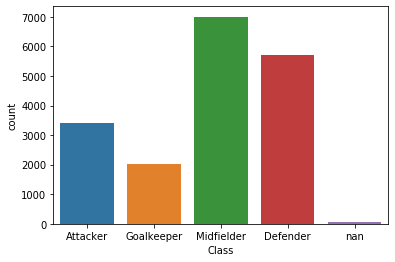

In [42]:
sns.countplot(fifa_19['Class'])

Most players are Midfielders in FIFA19

### Multivariate Analysis

#### Relationship between Overall and Preferred Foot

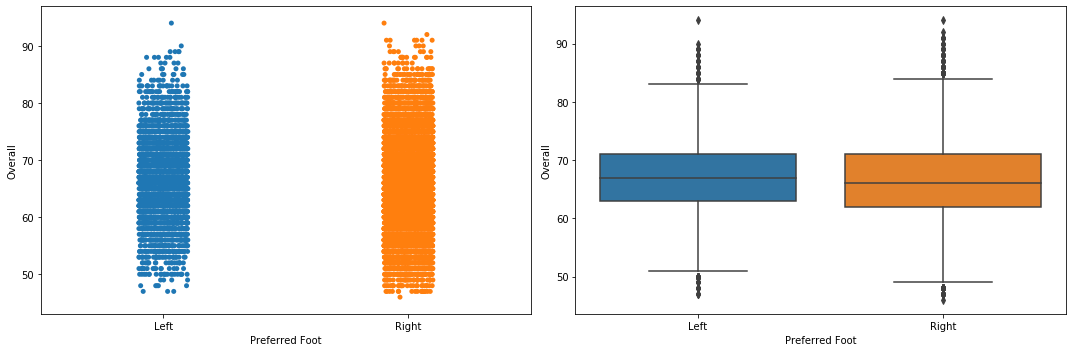

In [43]:
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(121)
g = sns.stripplot(x="Preferred Foot", y="Overall", data=fifa_19, ax=ax1)

ax2 = fig.add_subplot(122)
g = sns.boxplot(x="Preferred Foot", y="Overall", data=fifa_19, ax=ax2)


plt.tight_layout()

Stripplot and box plot both show that overall and preferred foot highly overlap with each other

#### Relationship between positions and nationalities

In [44]:
nation_fifa = fifa_19.groupby(by="Nationality")

In [45]:
nation_fifa['Position'].value_counts().sort_values(ascending=False)[:10]

Nationality  Position
England      ST          226
             CM          196
             GK          174
Germany      GK          164
England      CB          161
Germany      CB          128
Argentina    ST          125
England      LB          124
             RB          119
Spain        GK          116
Name: Position, dtype: int64

Top 10 correlations of Positions and nationalities <br>
England accounts for highest number of players in Fifa 19 and also provides most STs, CMs, GKs, CBs, LBs and RBs <br>

#### Nationality vs Overall Rating

<BarContainer object of 10 artists>

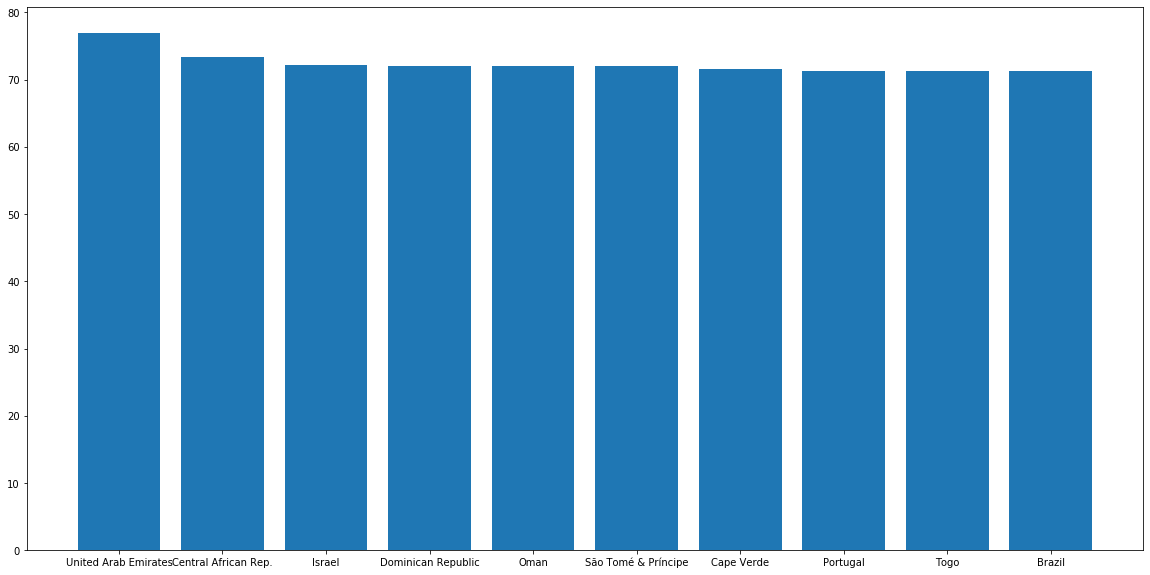

In [46]:
plt.figure(figsize=(20,10))
plt.bar(x=nation_fifa['Overall'].mean().sort_values(ascending=False)[:10].index, height=nation_fifa['Overall'].mean().sort_values(ascending=False)[:10])

UAE Gives us the highest average rated players. Now this may be because they have a very low player count

In [47]:
nation_fifa['Overall'].mean().sort_values(ascending=False)[:10]

Nationality
United Arab Emirates    77.000000
Central African Rep.    73.333333
Israel                  72.142857
Dominican Republic      72.000000
Oman                    72.000000
São Tomé & Príncipe     72.000000
Cape Verde              71.631579
Portugal                71.344720
Togo                    71.333333
Brazil                  71.251511
Name: Overall, dtype: float64

Mean and median values are same so it is clear that they only have multiple(or 1) player with 77 rating in FIFA 19

In [48]:
fifa_19[fifa_19.Nationality=="United Arab Emirates"]

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Class
1170,245221,O. Abdulrahman,26,https://cdn.sofifa.org/players/4/19/245221.png,United Arab Emirates,https://cdn.sofifa.org/flags/190.png,77,78,Al Hilal,https://cdn.sofifa.org/teams/2/light/605.png,...,46.0,26.0,30.0,12.0,13.0,14.0,11.0,8.0,€18.6M,Midfielder


As we predicted, only 1 player with 77 rating belonging to UAE

In [49]:
#Comparing with Brazil
print("We have a total of " + str(fifa_19[fifa_19.Nationality=="Brazil"].shape[0]) + " Brazilian Players")

We have a total of 827 Brazilian Players


Exploring the 2085 null values 

In [50]:
Counter(fifa_19[fifa_19.CB.isnull()]['Position'].to_list())

Counter({'GK': 2025, nan: 60})

2025 of them are goalkeepers (100%)

In [51]:
fifa_19[fifa_19.Position.isnull()].isnull().sum().to_dict()

{'ID': 0,
 'Name': 0,
 'Age': 0,
 'Photo': 0,
 'Nationality': 0,
 'Flag': 0,
 'Overall': 0,
 'Potential': 0,
 'Club': 12,
 'Club Logo': 0,
 'Value': 0,
 'Wage': 0,
 'Special': 0,
 'Preferred Foot': 48,
 'International Reputation': 48,
 'Weak Foot': 48,
 'Skill Moves': 48,
 'Work Rate': 48,
 'Body Type': 48,
 'Real Face': 48,
 'Position': 60,
 'Jersey Number': 60,
 'Joined': 60,
 'Loaned From': 60,
 'Contract Valid Until': 60,
 'Height': 48,
 'Weight': 0,
 'LS': 60,
 'ST': 60,
 'RS': 60,
 'LW': 60,
 'LF': 60,
 'CF': 60,
 'RF': 60,
 'RW': 60,
 'LAM': 60,
 'CAM': 60,
 'RAM': 60,
 'LM': 60,
 'LCM': 60,
 'CM': 60,
 'RCM': 60,
 'RM': 60,
 'LWB': 60,
 'LDM': 60,
 'CDM': 60,
 'RDM': 60,
 'RWB': 60,
 'LB': 60,
 'LCB': 60,
 'CB': 60,
 'RCB': 60,
 'RB': 60,
 'Crossing': 48,
 'Finishing': 48,
 'HeadingAccuracy': 48,
 'ShortPassing': 48,
 'Volleys': 48,
 'Dribbling': 48,
 'Curve': 48,
 'FKAccuracy': 48,
 'LongPassing': 48,
 'BallControl': 48,
 'Acceleration': 48,
 'SprintSpeed': 48,
 'Agility': 48,

This shows we have too little information on these players. We don't even have their in-game stats

In [52]:
fifa_19[fifa_19.Position.isnull()]['Overall'].describe()

count    60.000000
mean     61.633333
std       2.869871
min      53.000000
25%      62.000000
50%      62.000000
75%      62.000000
max      70.000000
Name: Overall, dtype: float64

These players have an average overall of 61 <br>
Without any information on the stats, we will not be able to accurately predict their class
Thus, we ignore these values

#### Predicting class using stats of players

In [53]:
data = fifa_19[~fifa_19.Position.isnull()]

In [54]:
X = data.drop("Class",axis=1)
X = X[['Crossing','Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']]
y = data['Class']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [92]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = ["Attacker", "Defender", "GoalKeeper","Midfielder"]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

In [98]:
def LogRegress(Xtrain, Ytrain, Xtest, Ytest):
    logmodel = LogisticRegression(penalty='l2', n_jobs=-1, )
    log_params = {'C':[10**x for x in range(-3,4)] }
    cross_validated_model = GridSearchCV(logmodel,param_grid=log_params, n_jobs=-1)
    cross_validated_model.fit(Xtrain,Ytrain)
    
    train_predictions = cross_validated_model.predict(Xtrain)
    test_predictions = cross_validated_model.predict(Xtest)
    print("*"*30)
    print("Logistic Regression\n")
    print("Train Set Scores: ")
    print("F1 Score is :")
    print(f1_score(Ytrain,train_predictions, average='micro'))
    print("Accuracy Score : " + str(accuracy_score(Ytrain,train_predictions)))
    plot_confusion_matrix(Ytrain,train_predictions)
    
    
    print("\n\nTest Set Scores: ")
    print("F1 Score is :")
    print(f1_score(Ytest,test_predictions, average='micro'))
    print("Accuracy Score : " + str(accuracy_score(Ytest,test_predictions)))
    plot_confusion_matrix(Ytest,test_predictions)
    
    print("Parameters used: ")
    print(cross_validated_model.best_params_)
    

In [99]:
def RForest(Xtrain, Ytrain, Xtest, Ytest):
    rfmodel = RandomForestClassifier(n_jobs=-1)
    rf_params = {'n_estimators':[10**x for x in range(1,4)] }
    cross_validated_model = GridSearchCV(rfmodel,param_grid=rf_params, n_jobs=-1)
    cross_validated_model.fit(Xtrain,Ytrain)
    train_predictions = cross_validated_model.predict(Xtrain)
    test_predictions = cross_validated_model.predict(Xtest)
    
    
    print("*"*30)
    print("Random Forest Classifier\n")
    print("Train Set Scores: ")
    print("F1 Score is :")
    print(f1_score(Ytrain,train_predictions, average='micro'))
    print("Accuracy Score : " + str(accuracy_score(Ytrain,train_predictions)))
    plot_confusion_matrix(Ytrain,train_predictions)
    
    print("\n\nTest Set Scores: ")
    print("F1 Score is :")
    print(f1_score(Ytest,test_predictions, average='micro'))
    print("Accuracy Score : " + str(accuracy_score(Ytest,test_predictions)))
    plot_confusion_matrix(Ytest,test_predictions)
    
    print("Parameters used: ")
    print(cross_validated_model.best_params_)
    

In [100]:
def XGBclass(Xtrain, Ytrain, Xtest, Ytest):
    xgbmodel = XGBClassifier(n_jobs=-1)
    xgb_params = {'n_estimators':[10**x for x in range(1,4)],'max_depth':[x for x in range(1,4)] }
    cross_validated_model = GridSearchCV(xgbmodel,param_grid=xgb_params,n_jobs=-1)
    cross_validated_model.fit(Xtrain,Ytrain)
    train_predictions = cross_validated_model.predict(Xtrain)
    test_predictions = cross_validated_model.predict(Xtest)
    
    
    print("*"*30)
    print("XGBoost Classifier\n")
    print("Train Set Scores: ")
    print("F1 Score is :")
    print(f1_score(Ytrain,train_predictions, average='micro'))
    print("Accuracy Score : " + str(accuracy_score(Ytrain,train_predictions)))
    plot_confusion_matrix(Ytrain,train_predictions)
    
    
    print("\n\nTest Set Scores: ")
    print("F1 Score is :")
    print(f1_score(Ytest,test_predictions, average='micro'))
    print("Accuracy Score : " + str(accuracy_score(Ytest,test_predictions)))
    plot_confusion_matrix(Ytest,test_predictions)
    
    
    print("Parameters used: ")
    print(cross_validated_model.best_params_)
    
    

******************************
Logistic Regression

Train Set Scores: 
F1 Score is :
0.8749741682165737
Accuracy Score : 0.8749741682165737


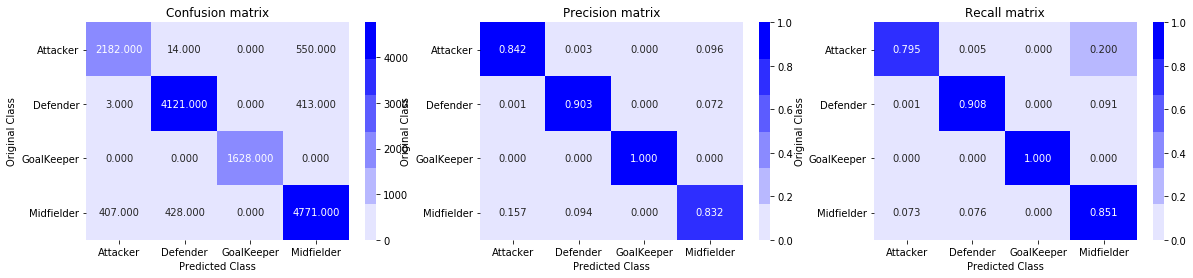



Test Set Scores: 
F1 Score is :
0.8694214876033057
Accuracy Score : 0.8694214876033057


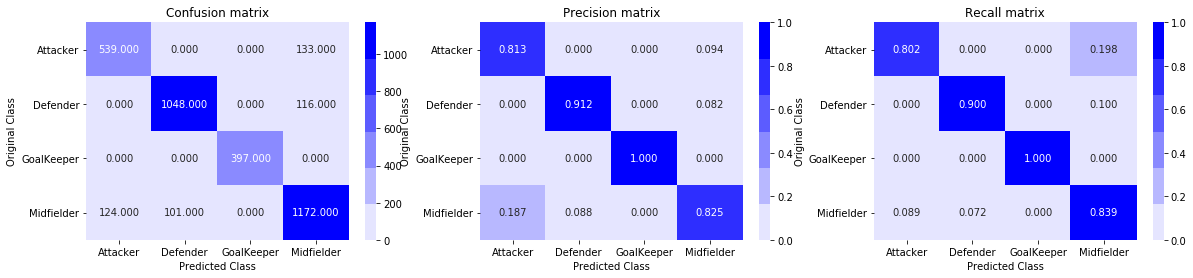

Parameters used: 
{'C': 0.1}
******************************
Random Forest Classifier

Train Set Scores: 
F1 Score is :
1.0
Accuracy Score : 1.0


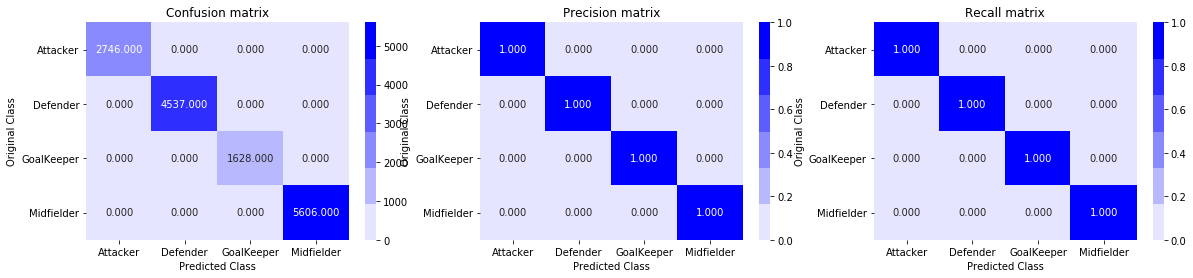



Test Set Scores: 
F1 Score is :
0.8754820936639118
Accuracy Score : 0.8754820936639118


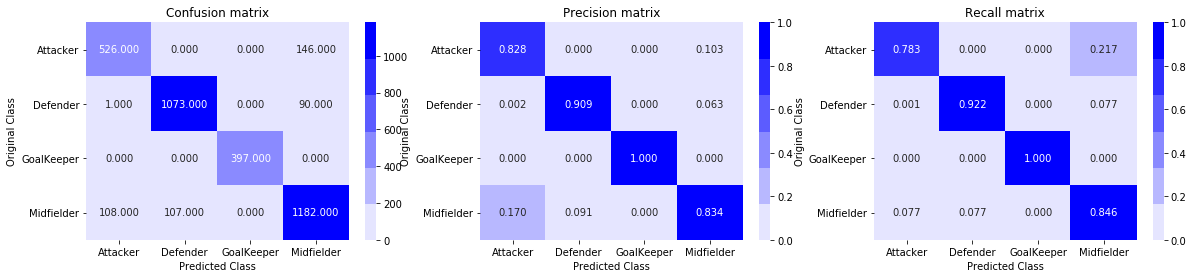

Parameters used: 
{'n_estimators': 1000}
******************************
XGBoost Classifier

Train Set Scores: 
F1 Score is :
0.9207136460701247
Accuracy Score : 0.9207136460701247


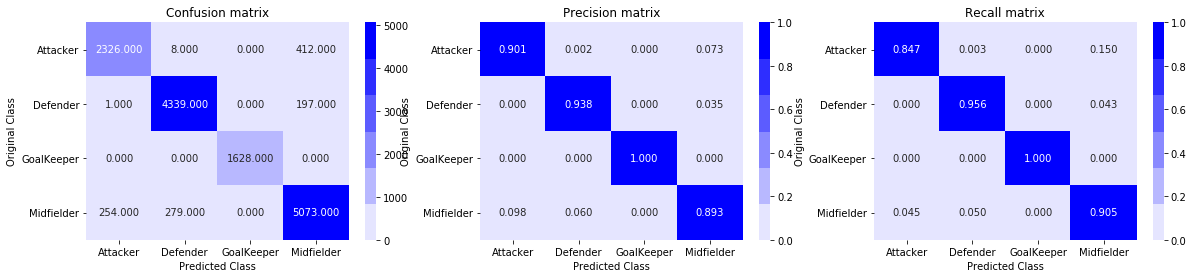



Test Set Scores: 
F1 Score is :
0.8721763085399449
Accuracy Score : 0.8721763085399449


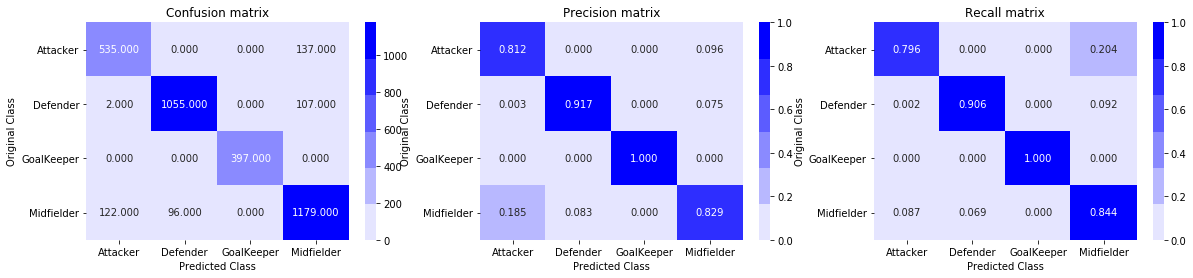

Parameters used: 
{'max_depth': 2, 'n_estimators': 1000}
Wall time: 1min 27s


In [101]:
%%time
LogRegress(X_train,y_train, X_test, y_test)
RForest(X_train,y_train, X_test, y_test)
XGBclass(X_train,y_train, X_test, y_test)

# Conclusion

Both XGBoost and Logistic Regression classifiers perform very well<br>
The difference between the Train and test accuracy scores of the Random Forest Classifier is higher as compared to the other 2 models indicating it is overfitting the dataset more as compared to the other 2.